In [210]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D, LeakyReLU, BatchNormalization
from tensorflow.keras.utils import to_categorical
import os
import matplotlib.pyplot as plt
import numpy as np
import glob
from PIL import Image
from matplotlib import image


### Using MNIST dataset

In [211]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
(x_train,x_test) = (x_train/255.0, x_test/255.0)


In [212]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

Number of images in x_train 60000
Number of images in x_test 10000


In [213]:
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [214]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)
model.summary()

Epoch 1/10
60000/60000 [==============================] - 12s 203us/sample - loss: 0.2065 - acc: 0.9377
Epoch 2/10
60000/60000 [==============================] - 12s 203us/sample - loss: 0.0829 - acc: 0.9744
Epoch 3/10
60000/60000 [==============================] - 12s 197us/sample - loss: 0.0604 - acc: 0.9802
Epoch 4/10
60000/60000 [==============================] - 12s 196us/sample - loss: 0.0444 - acc: 0.9853
Epoch 5/10
60000/60000 [==============================] - 12s 199us/sample - loss: 0.0350 - acc: 0.9883
Epoch 6/10
60000/60000 [==============================] - 12s 195us/sample - loss: 0.0300 - acc: 0.9903
Epoch 7/10
60000/60000 [==============================] - 12s 193us/sample - loss: 0.0250 - acc: 0.9914
Epoch 8/10
60000/60000 [==============================] - 11s 188us/sample - loss: 0.0248 - acc: 0.9916
Epoch 9/10
60000/60000 [==============================] - 12s 192us/sample - loss: 0.0192 - acc: 0.9938
Epoch 10/10
60000/60000 [==============================] - 12s 1

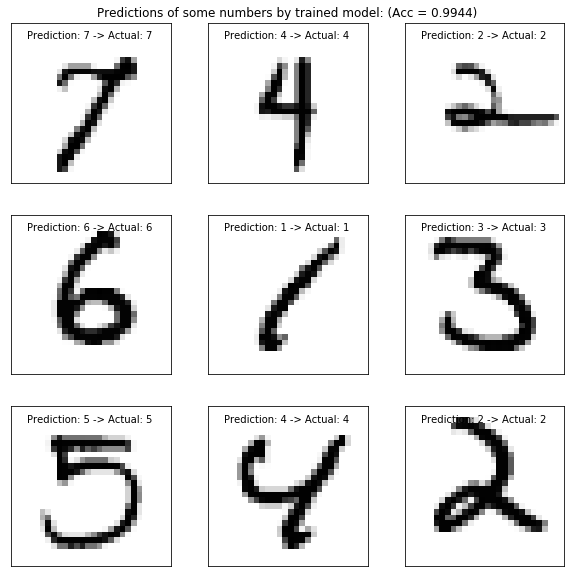

In [215]:
fig = plt.figure(figsize = (10,10))
plt.title("Predictions of some numbers by trained model: (Acc = 0.9944)")
plt.axis('off')
for i in range(1, 10):
    img_idx = np.random.randint(10000)
    ax = fig.add_subplot(3, 3, i)
    ax.imshow(x_test[img_idx].reshape(28, 28),cmap='Greys')
    ax.xaxis.set_visible(False);  ax.yaxis.set_visible(False)
    pred = model.predict(x_test[img_idx].reshape(1, 28, 28, 1))

    ax.annotate(("Prediction: " + str(pred.argmax()) + " -> Actual: " + str(y_test[img_idx])),
                xy=(0.1, 0.9), xycoords="axes fraction")
#plt.savefig('NMIST_preds.png')

## Try classifying fruit images



In [24]:
img = Image.open("fruits_data_set_2017_12_27/Training/Apple Red 1/0_100.jpg")
data = image.imread("fruits_data_set_2017_12_27/Training/Apple Red 1/0_100.jpg")
gs_image = img.convert(mode='L')
np.array(gs_image).shape

(100, 100)


(100, 100)

In [172]:
#Load up the fruit training and test images
train_images = []
test_images = []
y_train = []
y_test = []
fruit_names = []
#Train
for label, filename in enumerate(os.listdir('fruits_data_set_2017_12_27/Training')):
    fruit_names.append(filename)
    for file in os.listdir('fruits_data_set_2017_12_27/Training/' + filename):
	# load image
        img = Image.open('fruits_data_set_2017_12_27/Training/' + filename + '//'+ file)

        gs_image = np.array(img.convert(mode='L'))
	# store loaded image
        train_images.append(gs_image)
        y_train.append(label)

#Test
for label, filename in enumerate(os.listdir('fruits_data_set_2017_12_27/Test')): 
    for file in os.listdir('fruits_data_set_2017_12_27/Test/' + filename):
	# load image
        img = Image.open('fruits_data_set_2017_12_27/Test/' + filename + '//'+ file)

        gs_image = np.array(img.convert(mode='L'))
	# store loaded image
        test_images.append(gs_image)
        y_test.append(label)
train_images = np.array(train_images)
test_images = np.array(test_images)
y_train, y_test = np.array(y_train), np.array(y_test)
train_images,test_images = train_images/255.0, test_images/255.0

In [173]:
x_train = train_images.reshape(-1, 100, 100, 1)
x_test = test_images.reshape(-1, 100, 100, 1)



In [174]:
idx_train = np.random.permutation(len(y_train))
idx_test = np.random.permutation(len(y_test))
x_train,y_train = x_train[idx_train], y_train[idx_train]
x_test, y_test = x_train[idx_test], y_train[idx_test]

In [125]:
#y_train = to_categorical(y_train, num_classes = 33)

In [159]:
model = Sequential()
model.add(Conv2D(16,(3,3),input_shape=(100,100,1),padding='same'))
model.add(LeakyReLU(0.5))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),padding='same'))
model.add(LeakyReLU(0.5))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(32,(3,3),padding='same'))
model.add(LeakyReLU(0.5))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(LeakyReLU(0.5))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256,activation='elu'))
model.add(Dropout(0.5))
model.add(Dense(60))
model.add(Activation("softmax"))

model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 100, 100, 16)      160       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 100, 100, 16)      0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 100, 100, 16)      64        
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 50, 50, 32)        4640      
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 50, 50, 32)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 50, 50, 32)      

In [162]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
15506/15506 [==============================] - 10s 639us/sample - loss: 1.0926 - acc: 0.6973
Epoch 2/10
15506/15506 [==============================] - 9s 606us/sample - loss: 0.1451 - acc: 0.9518
Epoch 3/10
15506/15506 [==============================] - 9s 607us/sample - loss: 0.0952 - acc: 0.9681
Epoch 4/10
15506/15506 [==============================] - 9s 611us/sample - loss: 0.0974 - acc: 0.9686
Epoch 5/10
15506/15506 [==============================] - 10s 616us/sample - loss: 0.0507 - acc: 0.9828 - loss: 0.0472 - ETA: 4s - loss: 0 - ETA: 3s - loss: 0.0498 -  - ETA: 2s - loss: 0.0508 - acc: 0.982  - ETA: 0s - loss: 0.0508 - acc: 0.98
Epoch 6/10
15506/15506 [==============================] - 10s 613us/sample - loss: 0.0469 - acc: 0.9849 - loss: 0.04 - ETA: 1s - loss: 0.0400 - ETA: 0s - loss: 0.0448 - a
Epoch 7/10
15506/15506 [==============================] - 10s 614us/sample - loss: 0.0508 - acc: 0.9841 - los
Epoch 8/10
15506/15506 [==============================] - 9s 61

Apricot Apple Red 1


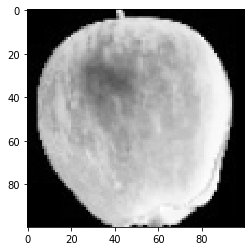

In [183]:

pred= model.predict(x_test[1].reshape(-1, 100, 100, 1))
print(fruit_names[pred.argmax()], fruit_names[y_test[1]])
plt.imshow(x_test[1].reshape(100,100), cmap = 'Greys')


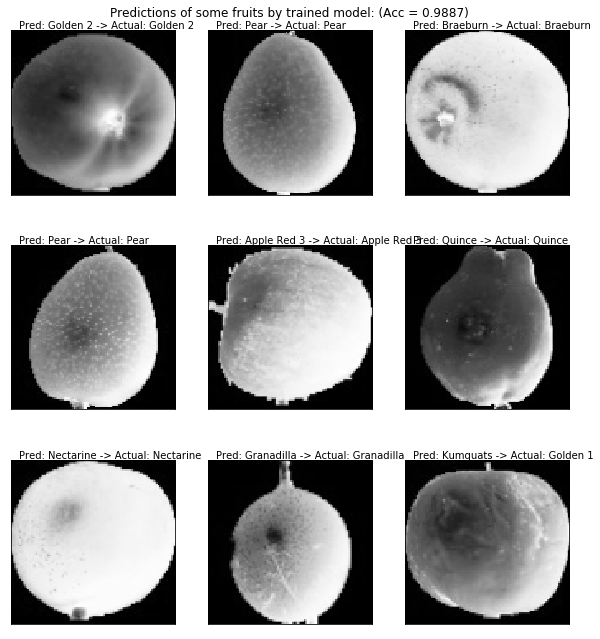

In [209]:
fig = plt.figure(figsize = (10,11.2))
plt.title("Predictions of some fruits by trained model: (Acc = 0.9887)")
plt.axis('off')
for i in range(1, 10):
    img_idx = np.random.randint(x_test.shape[0])
    ax = fig.add_subplot(3, 3, i)
    ax.imshow(x_test[img_idx].reshape(100, 100),cmap='Greys')
    ax.xaxis.set_visible(False);  ax.yaxis.set_visible(False)

    pred = model.predict(x_test[img_idx].reshape(-1, 100, 100, 1))

    ax.annotate(("Pred: " + str(fruit_names[pred.argmax()]) + " -> Actual: " + str(fruit_names[y_test[img_idx]])),
                xy=(0.05, 1.01), xycoords="axes fraction")
#plt.savefig('Fruit_preds.png')

5195